In [247]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
sns.set(style='whitegrid')

In [248]:
num_DiDi_lst = [10,20,40,60,80,100,150,200] # [10,50,100]
pro_Autonavi_lst = [0.001,0.005,0.01] + list(np.arange(0,0.31,0.05)[1:])
pro_Autonavi_lst = [round(i,3) for i in pro_Autonavi_lst]

note = '天数上限10&测试集周期抽取'

In [249]:
df = pd.read_csv(f"Performance/performance_timeFeature_{note}.csv",encoding='utf-8')
df['date'] = df['date'] + 1  # 加1的原因，是因为原始的date=1其实是第二天的数据

DiDi_df = pd.pivot(df[df['Type']=='DiDi'],columns=['Note'],index=['n','Pro','date'],values='MAPE').reset_index()
DiDi_df

Autonavi_df = pd.pivot(df[df['Type']=='Autonavi'],columns=['Note'],index=['n','Pro','date'],values='MAPE').reset_index()
Autonavi_df

Note    n    Pro  date      pure     total
0      10  0.001     2  0.886695  1.076044
1      10  0.001     3  0.687059  1.164906
2      10  0.001     4  0.938022  1.177223
3      10  0.001     5  0.433080  0.942191
4      10  0.001     6  0.474385  0.776731
...   ...    ...   ...       ...       ...
2011  200  0.300    25  0.237695  0.187039
2012  200  0.300    26  0.242935  0.188403
2013  200  0.300    27  0.218811  0.179815
2014  200  0.300    28  0.241945  0.193446
2015  200  0.300    29  0.229007  0.188704

[2016 rows x 5 columns]

In [250]:
num_DiDi_lst

[10, 20, 40, 60, 80, 100, 150, 200]

# 画某一个确切日期下的随比例变化学习效果

In [251]:
# trainDate = 5
# line_color_list = ['#C9DBEA','#9FC7E0','#68AAD1','#1B7CB3','#4778A9','#2E548C','#08306C','#001175']

# # plt.rcParams['font.family'] = 'Times New Roman'
# plt.figure(figsize=(12,3.5),dpi=300)

# plt.subplot(1,2,1)
# for i in range(len(num_DiDi_lst)):
#     num_DiDi = num_DiDi_lst[i]
#     x = Autonavi_df[(Autonavi_df['n']==num_DiDi)&(Autonavi_df['date']==trainDate)]['Pro'].tolist()
#     y = Autonavi_df[(Autonavi_df['n']==num_DiDi)&(Autonavi_df['date']==trainDate)]['pure'].tolist()
#     plt.plot(x,y,linestyle='-',marker='o',linewidth=1,markersize=3,color=line_color_list[i],label='Autonavi Result with num_DiDi='+str(num_DiDi))

# plt.plot(DiDi_df[DiDi_df['date']==trainDate]['Pro'].tolist(),DiDi_df[DiDi_df['date']==trainDate]['pure'].tolist(),linestyle='--',marker='o',linewidth=1.5,markersize=3.5,color='#E38D8C',label='DiDi Result')

# font = FontProperties(style='normal', size=8) # family='Times New Roman'
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# plt.xlabel('Pro',fontsize=10)
# plt.ylabel('MAPE',fontsize=10)
# plt.title('PureTest Result')
# plt.legend(prop=font)

# plt.subplot(1,2,2)
# for i in range(len(num_DiDi_lst)):
#     num_DiDi = num_DiDi_lst[i]
#     x = Autonavi_df[(Autonavi_df['n']==num_DiDi)&(Autonavi_df['date']==trainDate)]['Pro'].tolist()
#     y = Autonavi_df[(Autonavi_df['n']==num_DiDi)&(Autonavi_df['date']==trainDate)]['total'].tolist()
#     plt.plot(x,y,linestyle='-',marker='o',linewidth=1,markersize=3,color=line_color_list[i],label='Autonavi Result with num_DiDi='+str(num_DiDi))

# plt.plot(DiDi_df[DiDi_df['date']==trainDate]['Pro'].tolist(),DiDi_df[DiDi_df['date']==trainDate]['total'].tolist(),linestyle='--',marker='o',linewidth=1.5,markersize=3.5,color='#E38D8C',label='DiDi Result')

# font = FontProperties(style='normal', size=8) #family='Times New Roman',
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# plt.xlabel('Pro',fontsize=10)
# plt.ylabel('MAPE',fontsize=10)
# plt.title('Total Result')
# plt.legend(prop=font)

# plt.subplots_adjust(hspace=0.3) 
# plt.show()


# 画多个日期下的随比例变化学习效果

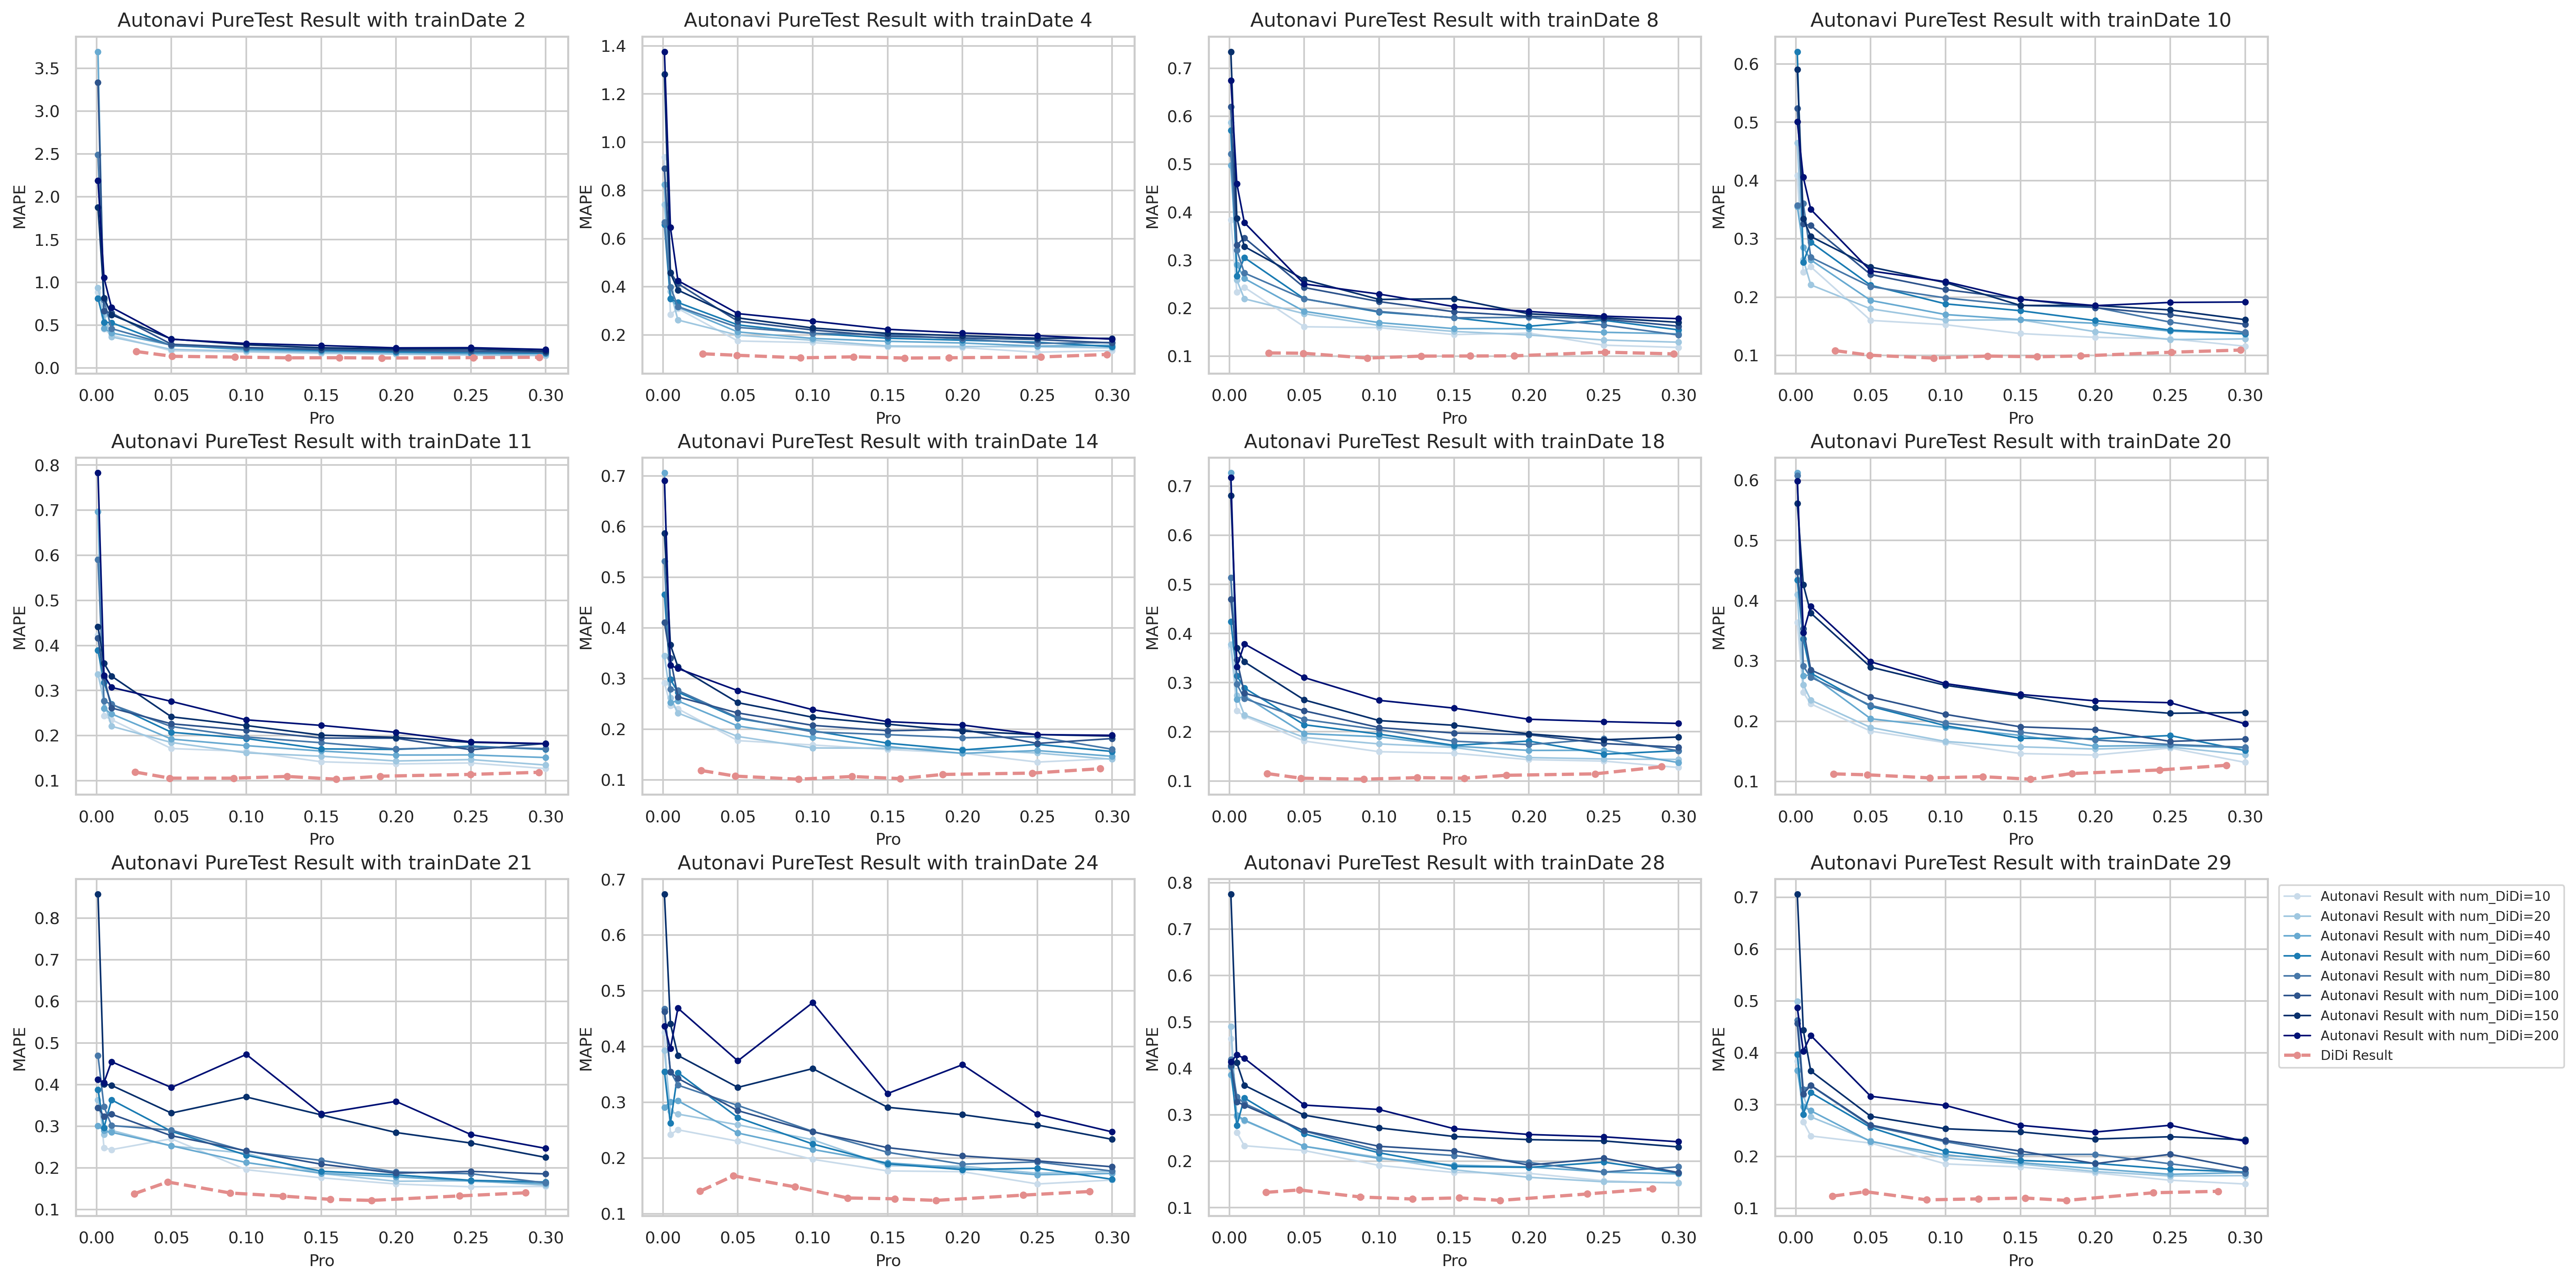

In [252]:
# pure的结果
line_color_list = ['#C9DBEA','#9FC7E0','#68AAD1','#1B7CB3','#4778A9','#2E548C','#08306C','#001175']
trainDate_lst = [2,4,8,10,11,14,18,20,21,24,28,29]  # n1*n2 个元素
n1 = 3 # 行
n2 = 4 # 列

plt.figure(figsize=(24,13),dpi=300)
for a in range(1,n1+1):
    for b in range(1,n2+1):
        trainDate = trainDate_lst[(a-1)*n2 + (b - 1)]
        plt.subplot(n1,n2,(a-1)*n2 + b)
        for i in range(len(num_DiDi_lst)):
            num_DiDi = num_DiDi_lst[i]
            x = Autonavi_df[(Autonavi_df['n']==num_DiDi)&(Autonavi_df['date']==trainDate)]['Pro'].tolist()
            y = Autonavi_df[(Autonavi_df['n']==num_DiDi)&(Autonavi_df['date']==trainDate)]['pure'].tolist()
            plt.plot(x,y,linestyle='-',marker='o',linewidth=1,markersize=3,color=line_color_list[i],label='Autonavi Result with num_DiDi='+str(num_DiDi))

        plt.plot(DiDi_df[DiDi_df['date']==trainDate]['Pro'].tolist(),DiDi_df[DiDi_df['date']==trainDate]['pure'].tolist(),linestyle='--',marker='o',linewidth=2,markersize=3.5,color='#E38D8C',label='DiDi Result')

        font = FontProperties(style='normal', size=8) # family='Times New Roman'
        plt.xticks(fontsize = 10)
        plt.yticks(fontsize = 10)
        # plt.ylim(0.06,0.8)
        plt.xlabel('Pro',fontsize=10)
        plt.ylabel('MAPE',fontsize=10)
        plt.title('Autonavi PureTest Result with trainDate '+str(trainDate))
        if trainDate == trainDate_lst[-1]:
            plt.legend(prop=font,bbox_to_anchor=(1.01, 1), loc='upper left')
plt.subplots_adjust(hspace=0.25,wspace=0.15) 
plt.show()

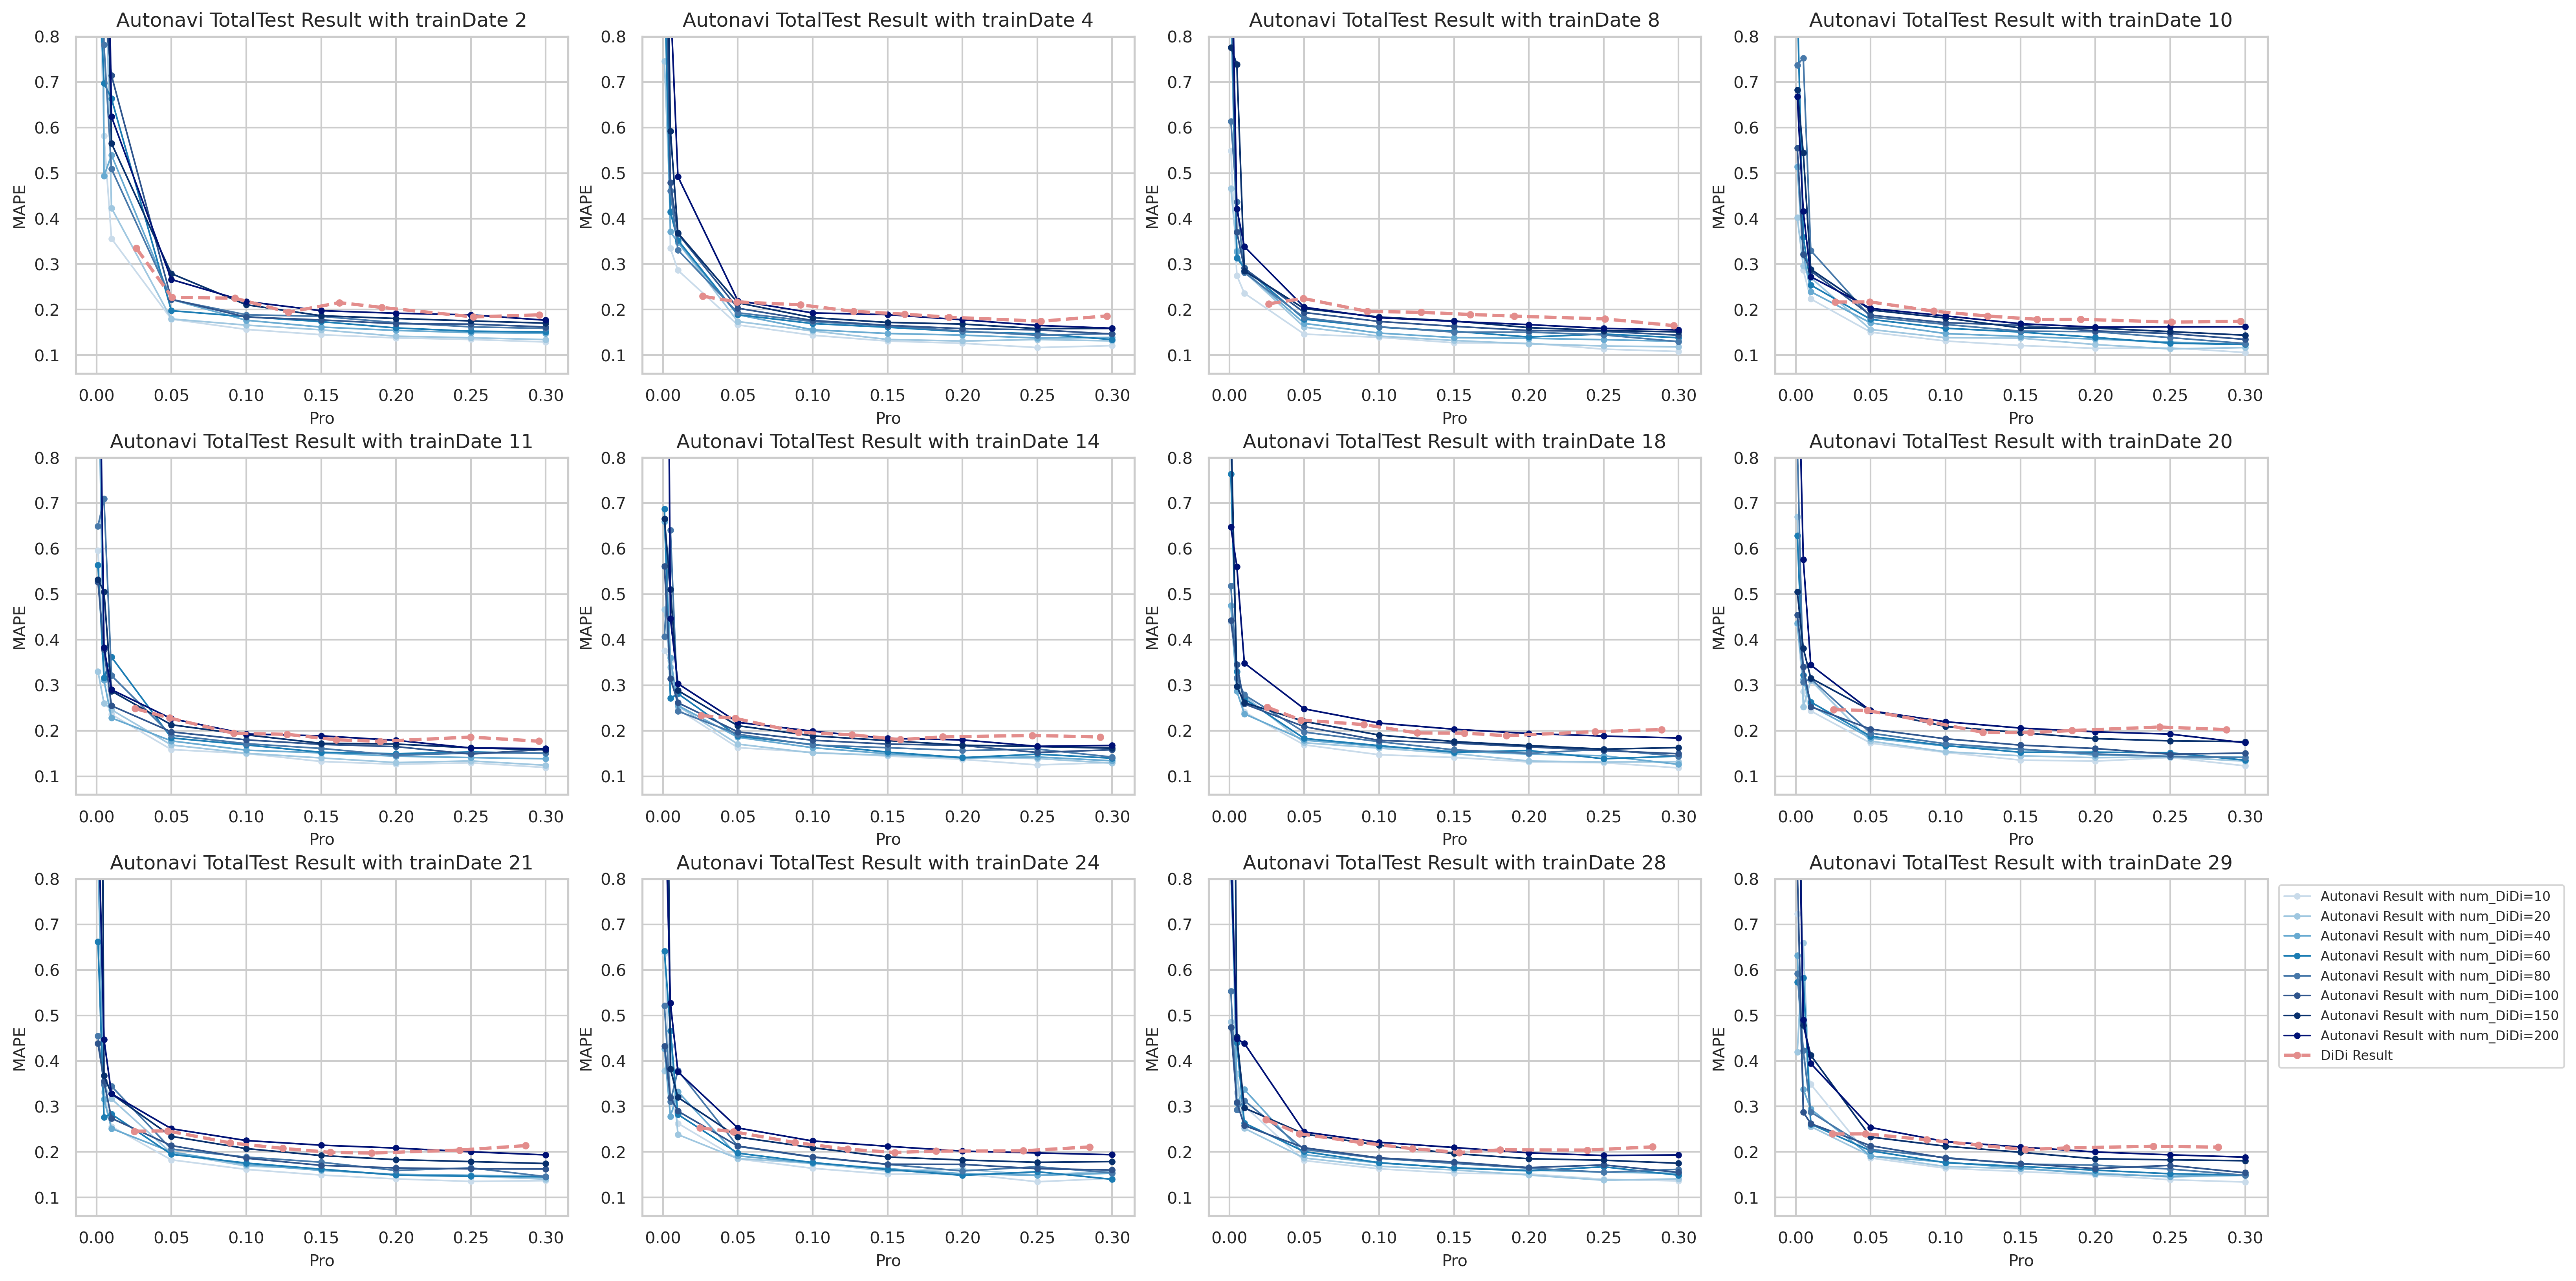

In [253]:
# total 的结果
# pure的结果
line_color_list = ['#C9DBEA','#9FC7E0','#68AAD1','#1B7CB3','#4778A9','#2E548C','#08306C','#001175']
trainDate_lst = [2,4,8,10,11,14,18,20,21,24,28,29]  # n1*n2 个元素
n1 = 3 # 行
n2 = 4 # 列

plt.figure(figsize=(24,13),dpi=300)
for a in range(1,n1+1):
    for b in range(1,n2+1):
        trainDate = trainDate_lst[(a-1)*n2 + (b - 1)]
        plt.subplot(n1,n2,(a-1)*n2 + b)
        for i in range(len(num_DiDi_lst)):
            num_DiDi = num_DiDi_lst[i]
            x = Autonavi_df[(Autonavi_df['n']==num_DiDi)&(Autonavi_df['date']==trainDate)]['Pro'].tolist()
            y = Autonavi_df[(Autonavi_df['n']==num_DiDi)&(Autonavi_df['date']==trainDate)]['total'].tolist()
            plt.plot(x,y,linestyle='-',marker='o',linewidth=1,markersize=3,color=line_color_list[i],label='Autonavi Result with num_DiDi='+str(num_DiDi))

        plt.plot(DiDi_df[DiDi_df['date']==trainDate]['Pro'].tolist(),DiDi_df[DiDi_df['date']==trainDate]['total'].tolist(),linestyle='--',marker='o',linewidth=2,markersize=3.5,color='#E38D8C',label='DiDi Result')

        font = FontProperties(style='normal', size=8) # family='Times New Roman'
        plt.xticks(fontsize = 10)
        plt.yticks(fontsize = 10)
        plt.ylim(0.06,0.8)
        plt.xlabel('Pro',fontsize=10)
        plt.ylabel('MAPE',fontsize=10)
        plt.title('Autonavi TotalTest Result with trainDate '+str(trainDate))
        if trainDate == trainDate_lst[-1]:
            plt.legend(prop=font,bbox_to_anchor=(1.01, 1), loc='upper left')
plt.subplots_adjust(hspace=0.25,wspace=0.15) 
plt.show()

# 红绿灯突变学习情况

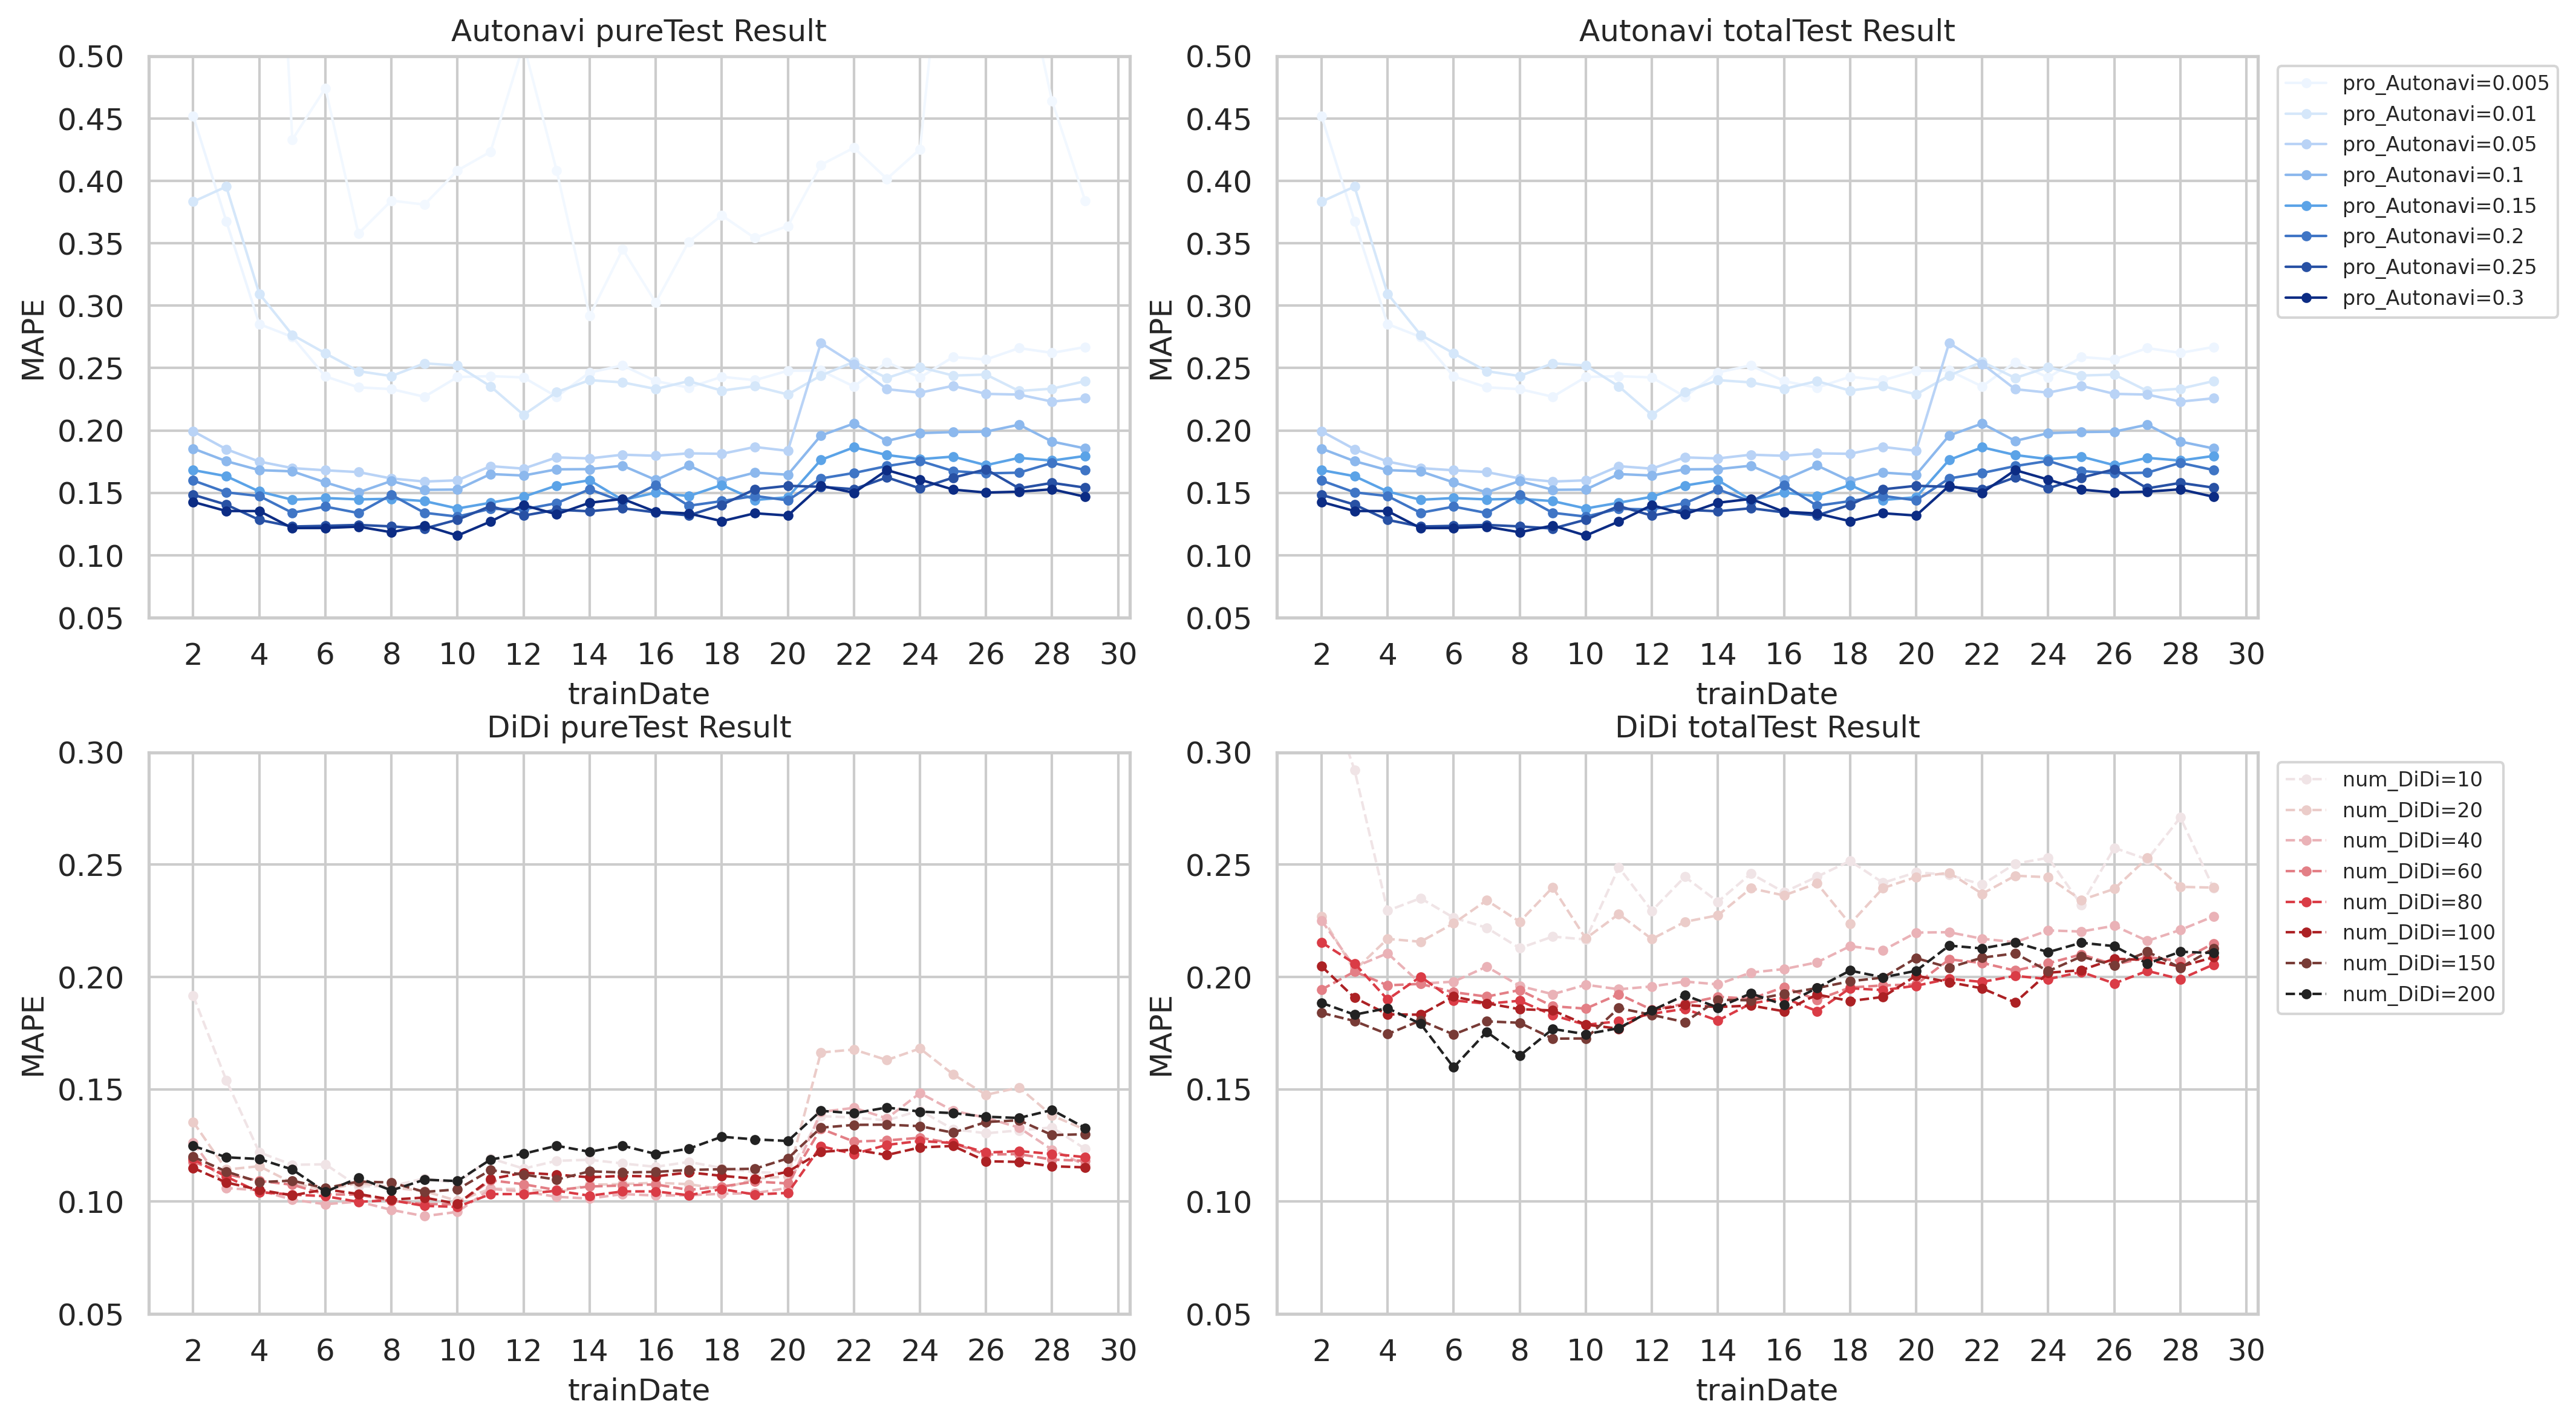

In [254]:
plt.style.use('fast')

Autonavi_color_list = [
    '#0c2c84',  # 深蓝色
    '#2851a4',
    '#3f75c5',
    '#5ba3e7',
    '#8cb8ed',
    '#b9d3f6',
    '#d5e7fa',
    '#edf5ff',
    '#f2f8ff'   # 略浅的蓝色
]#['#0e4d92','#1a75bb','#3399cc','#66b2d8','#99cced','#cce5ff','#e6f2ff','#f2f8ff']
Autonavi_color_list.reverse()
DiDi_color_list = ['#F0E4E6','#EBCCC9','#EAB2B7','#E37F86','#DA3C46','#AC2124','#783B36','#222222']

# plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(15,9),dpi=300)

Autonavi_df.sort_values(by='date',inplace=True)
DiDi_df.sort_values(by='date',inplace=True)

plt.subplot(2,2,1)
for i in range(len(pro_Autonavi_lst)):
    pro_Autonavi = pro_Autonavi_lst[i]
    x = Autonavi_df[(Autonavi_df['Pro']==pro_Autonavi)&(Autonavi_df['n']==10)]['date'].tolist()
    y = Autonavi_df[(Autonavi_df['Pro']==pro_Autonavi)&(Autonavi_df['n']==10)]['pure'].tolist() 
    plt.plot(x,y,linestyle='-',marker='o',linewidth=1,markersize=3,color=Autonavi_color_list[i],label='pro_Autonavi='+str(pro_Autonavi))

font = FontProperties(style='normal', size=8)  #family='Times New Roman',
plt.xticks(range(2,31,2),fontsize = 12)
plt.yticks(fontsize = 12)
# plt.xlim(0,19)
plt.ylim(0.05,0.5)
plt.xlabel('trainDate',fontsize = 12)
plt.ylabel('MAPE',fontsize = 12)
plt.title('Autonavi pureTest Result')
# plt.legend(prop=font,bbox_to_anchor=(1.01, 1), loc='upper left')
# plt.show()

plt.subplot(2,2,3)
# plt.rcParams['font.family'] = 'Times New Roman'
# plt.figure(figsize=(8,8),dpi=300)
for j in range(len(num_DiDi_lst)):
    num_DiDi = num_DiDi_lst[j]
    x = DiDi_df[(DiDi_df['n']==num_DiDi)]['date'].tolist()
    y = DiDi_df[(DiDi_df['n']==num_DiDi)]['pure'].tolist()
    plt.plot(x,y,linestyle='--',marker='o',linewidth=1,markersize=3,color=DiDi_color_list[j],label='num_DiDi='+str(num_DiDi))

font = FontProperties(style='normal', size=8)  # family='Times New Roman', 
plt.xticks(range(2,31,2),fontsize = 12)
plt.yticks(fontsize = 12)
# plt.xlim(0,19)
plt.ylim(0.05,0.3)
plt.xlabel('trainDate',fontsize = 12)
plt.ylabel('MAPE',fontsize = 12)
plt.title('DiDi pureTest Result')
# plt.legend(prop=font,bbox_to_anchor=(1.01, 1), loc='upper left')


plt.subplot(2,2,2)
for i in range(len(pro_Autonavi_lst)):
    pro_Autonavi = pro_Autonavi_lst[i]
    if pro_Autonavi != 0.001:
        x = Autonavi_df[(Autonavi_df['Pro']==pro_Autonavi)&(Autonavi_df['n']==10)]['date'].tolist()
        y = Autonavi_df[(Autonavi_df['Pro']==pro_Autonavi)&(Autonavi_df['n']==10)]['pure'].tolist()
        plt.plot(x,y,linestyle='-',marker='o',linewidth=1,markersize=3,color=Autonavi_color_list[i],label='pro_Autonavi='+str(pro_Autonavi))

font = FontProperties(style='normal', size=8)  # family='Times New Roman', 
plt.xticks(range(2,31,2),fontsize = 12)
plt.yticks(fontsize = 12)
# plt.xlim(0,19)
plt.ylim(0.05,0.5)
plt.xlabel('trainDate',fontsize = 12)
plt.ylabel('MAPE',fontsize = 12)
plt.title('Autonavi totalTest Result')
plt.legend(prop=font,bbox_to_anchor=(1.01, 1), loc='upper left')
# plt.show()

plt.subplot(2,2,4)
# plt.rcParams['font.family'] = 'Times New Roman'
# plt.figure(figsize=(8,8),dpi=300)
for j in range(len(num_DiDi_lst)):
    num_DiDi = num_DiDi_lst[j]
    x = DiDi_df[(DiDi_df['n']==num_DiDi)]['date'].tolist()
    y = DiDi_df[(DiDi_df['n']==num_DiDi)]['total'].tolist()
    plt.plot(x,y,linestyle='--',marker='o',linewidth=1,markersize=3,color=DiDi_color_list[j],label='num_DiDi='+str(num_DiDi))

font = FontProperties(style='normal', size=8)  # family='Times New Roman', 
plt.xticks(range(2,31,2),fontsize = 12)
plt.yticks(fontsize = 12)
# plt.xlim(0,19)
plt.ylim(0.05,0.3)
plt.xlabel('trainDate',fontsize = 12)
plt.ylabel('MAPE',fontsize = 12)
plt.title('DiDi totalTest Result')
plt.legend(prop=font,bbox_to_anchor=(1.01, 1), loc='upper left')


# 设置背景颜色为浅灰色
# plt.gcf().set_facecolor('lightgrey')
plt.subplots_adjust(hspace=0.24,wspace=0.15) 

plt.show()


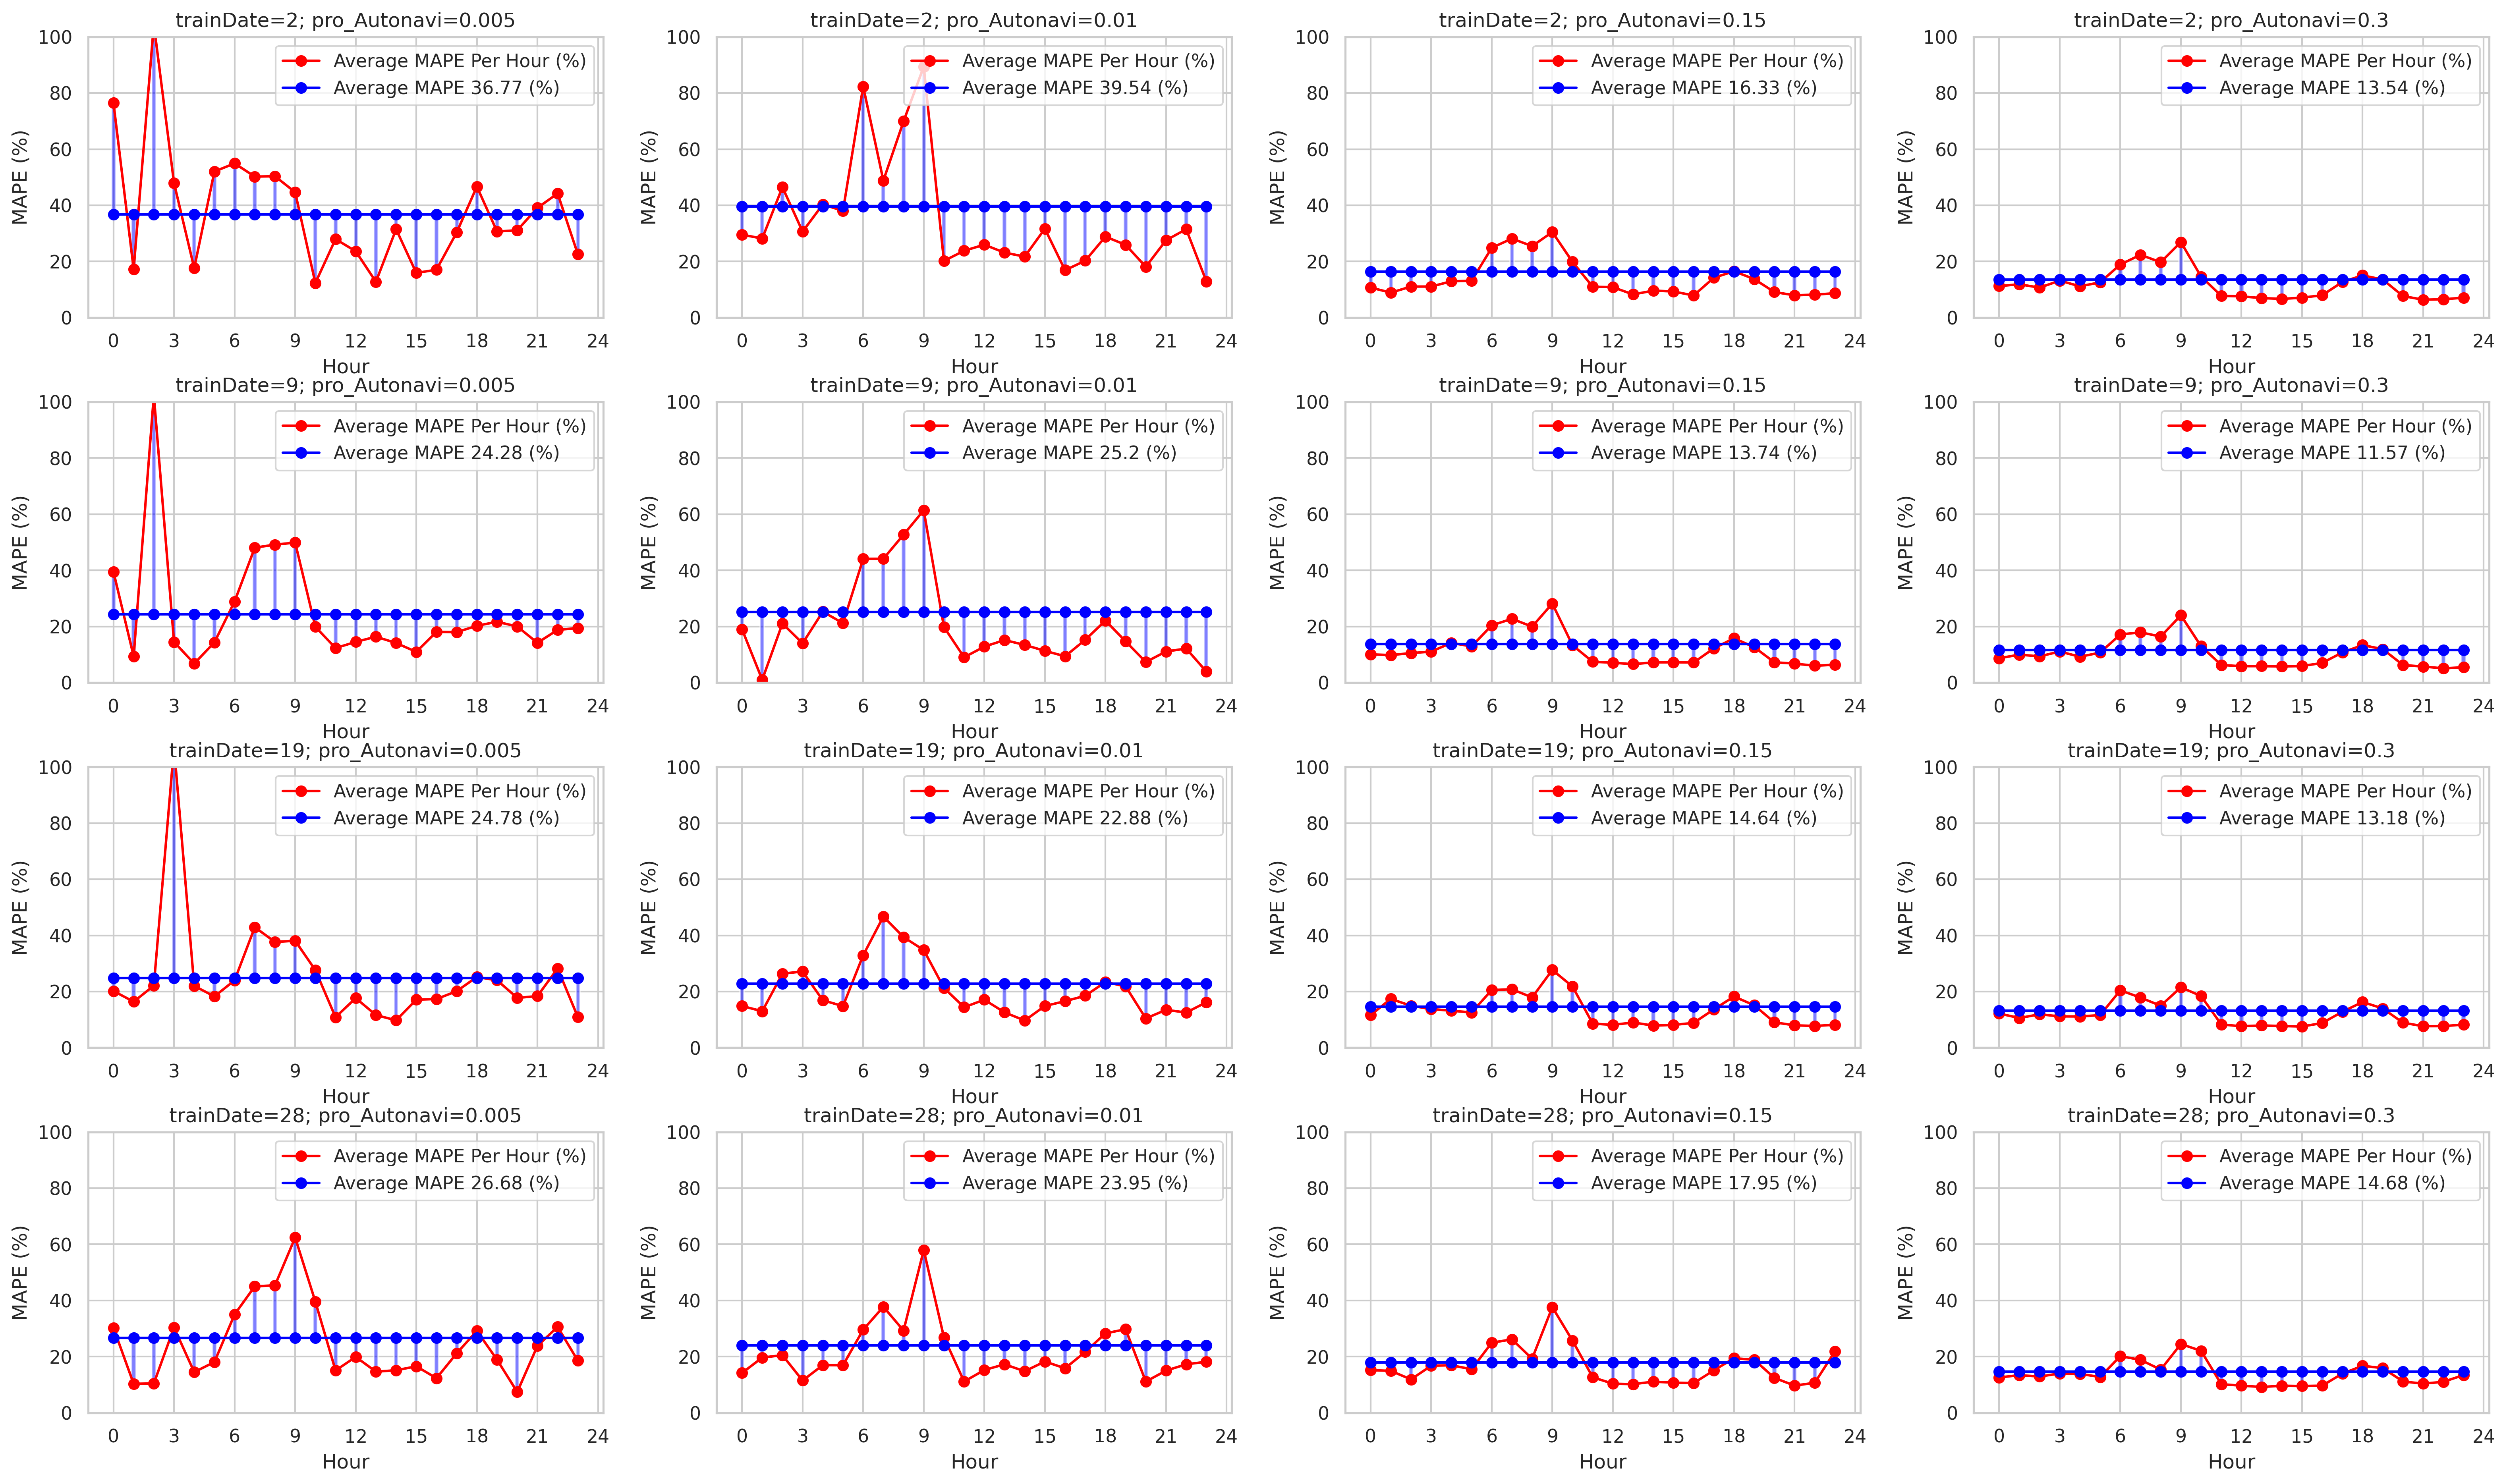

In [255]:
# 高德的时段影响 pure

time_trainDate_lst = [2,9,19,28]
time_pro_Autonavi_lst = [0.005 , 0.01 , 0.15 ,0.3]

fig, axs = plt.subplots(len(time_trainDate_lst), len(time_pro_Autonavi_lst), figsize=(26, 15), dpi=300)

for i in range(len(time_trainDate_lst)):
    trainDate = time_trainDate_lst[i]
    for j in range(len(time_pro_Autonavi_lst)):
        pro_Autonavi = time_pro_Autonavi_lst[j]
        path = f"TimeFeature_predictResult/{note}/TimeFeature_Autonavi_predictions_n10_Pro{pro_Autonavi}_date{trainDate}.csv"
        df = pd.read_csv(path,encoding='utf-8')
        avgmape = round(mean_absolute_percentage_error(df['Travel Time'],df['Predicted Travel Time'])*100,2)
        # mape = df.groupby('Hour').apply(lambda group : mean_absolute_percentage_error(group['Travel Time'],group['autonavi_preTravelTime'])*100).reindex(np.arange(0, 24), fill_value=0)
        mape = df.groupby('Hour').apply(lambda group : mean_absolute_percentage_error(group['Travel Time'],group['Predicted Travel Time'])*100).reindex(np.arange(0, 24), fill_value=None)
        time_of_day = mape.index.tolist()
        avgmape = np.array([avgmape for _ in range(len(time_of_day))])
        # 开始画图
        
        axs[i, j].plot(time_of_day, mape.tolist(), color='red', marker='o', label='Average MAPE Per Hour (%)')
        axs[i, j].plot(time_of_day, avgmape, color='blue', marker='o', label=f'Average MAPE {avgmape[0]} (%)')
        
        # 计算柱状条的高度
        bar_heights = np.abs(mape - avgmape)
        bar_width = 0.2  # 设置柱状条的宽度

        # 绘制悬空的柱状条
        for t in range(len(time_of_day)):
            time = time_of_day[t]
            axs[i, j].bar(time, bar_heights[time], width=bar_width, bottom=min(mape[time], avgmape[t]), alpha=0.5, color='blue')

        # 添加标题和标签
        # axs[i, j].set_title('MAPE over Time of Day\n'+'trainDate='+str(trainDate)+'; pro_Autonavi='+str(pro_Autonavi))
        axs[i, j].set_title('trainDate='+str(trainDate)+'; pro_Autonavi='+str(pro_Autonavi))
        axs[i, j].set_xticks(range(0, 25, 3))
        axs[i, j].set_ylim(0,100)
        axs[i, j].set_xlabel('Hour')
        axs[i, j].set_ylabel('MAPE (%)')
        axs[i, j].legend()

plt.subplots_adjust(wspace=0.22,hspace=0.3) 
plt.show()


            



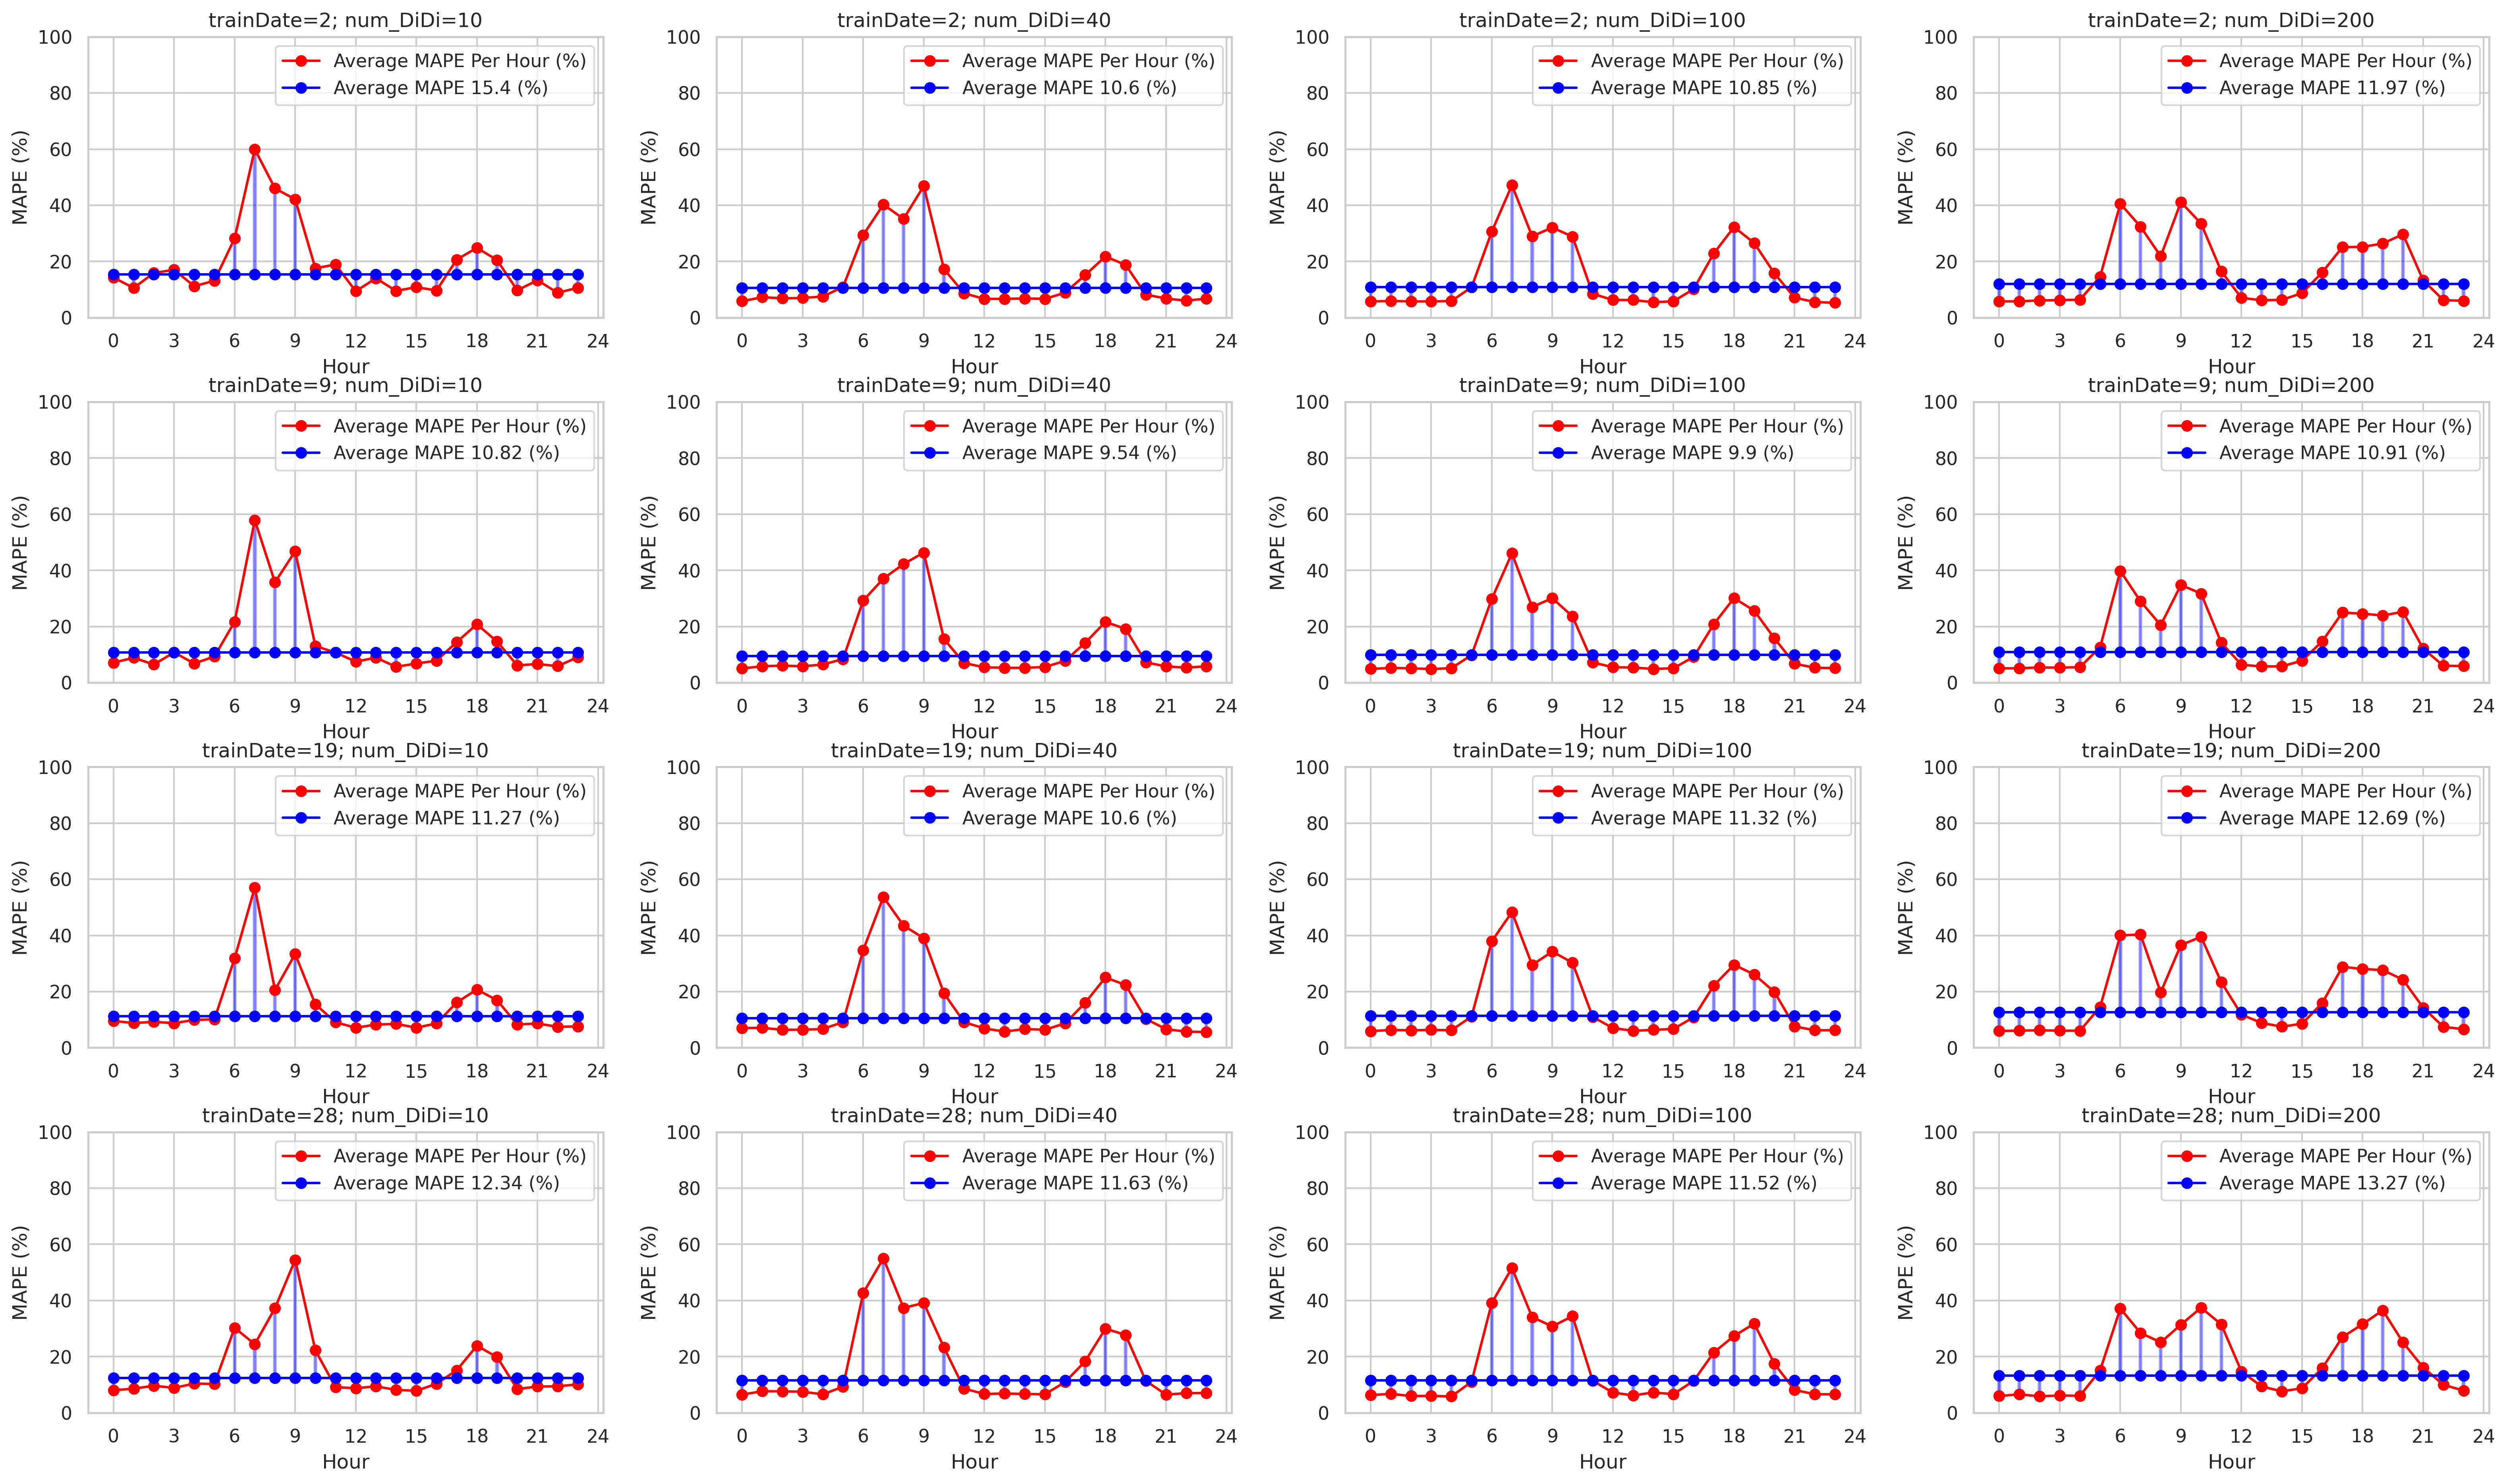

In [256]:
# 滴滴的时段影响

time_trainDate_lst = [2,9,19,28]
time_num_DiDi_lst = [10, 40, 100 , 200]

fig, axs = plt.subplots(len(time_trainDate_lst), len(time_num_DiDi_lst), figsize=(26, 15), dpi=300)

for i in range(len(time_trainDate_lst)):
    trainDate = time_trainDate_lst[i]
    for j in range(len(time_num_DiDi_lst)):
        num_DiDi = time_num_DiDi_lst[j]
        path = f"TimeFeature_predictResult/{note}/TimeFeature_DiDi_predictions_n{num_DiDi}_date{trainDate}.csv"
        df = pd.read_csv(path,encoding='utf-8')
        avgmape = round(mean_absolute_percentage_error(df['Travel Time'],df['Predicted Travel Time'])*100,2)
        # mape = df.groupby('Hour').apply(lambda group : mean_absolute_percentage_error(group['Travel Time'],group['DiDi_preTravelTime'])*100).reindex(np.arange(0, 24), fill_value=0)
        mape = df.groupby('Hour').apply(lambda group : mean_absolute_percentage_error(group['Travel Time'],group['Predicted Travel Time'])*100).reindex(np.arange(0, 24), fill_value=None)
        time_of_day = mape.index.tolist()
        avgmape = np.array([avgmape for _ in range(len(time_of_day))])
        # 开始画图
        
        axs[i, j].plot(time_of_day, mape.tolist(), color='red', marker='o', label='Average MAPE Per Hour (%)')
        axs[i, j].plot(time_of_day, avgmape, color='blue', marker='o', label=f'Average MAPE {avgmape[0]} (%)')
        
        # 计算柱状条的高度
        bar_heights = np.abs(mape - avgmape)
        bar_width = 0.2  # 设置柱状条的宽度

        # 绘制悬空的柱状条
        for t in range(len(time_of_day)):
            time = time_of_day[t]
            axs[i, j].bar(time, bar_heights[time], width=bar_width, bottom=min(mape[time], avgmape[t]), alpha=0.5, color='blue')

        # 添加标题和标签
        axs[i, j].set_title('trainDate='+str(trainDate)+'; num_DiDi='+str(num_DiDi))
        axs[i, j].set_xticks(range(0, 25, 3))
        axs[i, j].set_ylim(0,100)
        axs[i, j].set_xlabel('Hour')
        axs[i, j].set_ylabel('MAPE (%)')
        axs[i, j].legend()
plt.subplots_adjust(wspace=0.22,hspace=0.3) 
plt.show()


            

